<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

# 1.

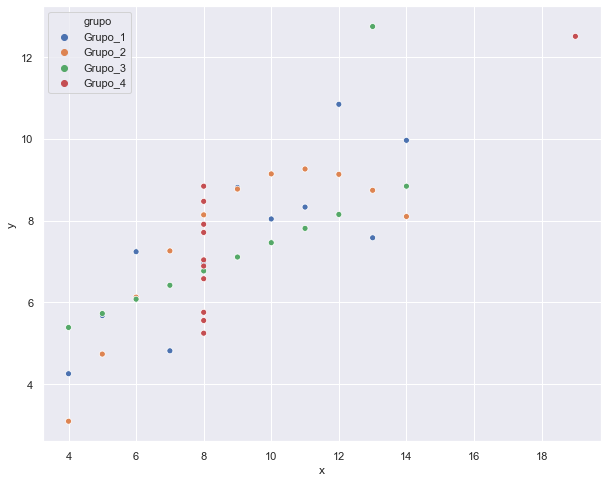

In [10]:

sns.set(rc={'figure.figsize':(10,8)})

sns.scatterplot(
    x='x',
    y='y',
    data=df,
    hue='grupo'
)  
plt.show()
#son bastante distintos entre sí

# 2.

In [39]:
df_grupo_1= df[df['grupo'] == 'Grupo_1']   
df_grupo_2= df[df['grupo'] == 'Grupo_2']   
df_grupo_3= df[df['grupo'] == 'Grupo_3']   
df_grupo_4= df[df['grupo'] == 'Grupo_4']
df_grupo_1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [35]:
df_grupo_2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [36]:
df_grupo_3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [37]:
df_grupo_4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


# 3 y 4

In [41]:
#Grupo1
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_grupo_1[['x']] # we only take the first two features.
y = df_grupo_1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

model_rl = LinearRegression()
model_rl.fit(X_train, y_train) 
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)
print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*y")

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3
El mejor ajuste lineal viene dado por la recta: 

     f(x) = 3.47 + 0.47*y


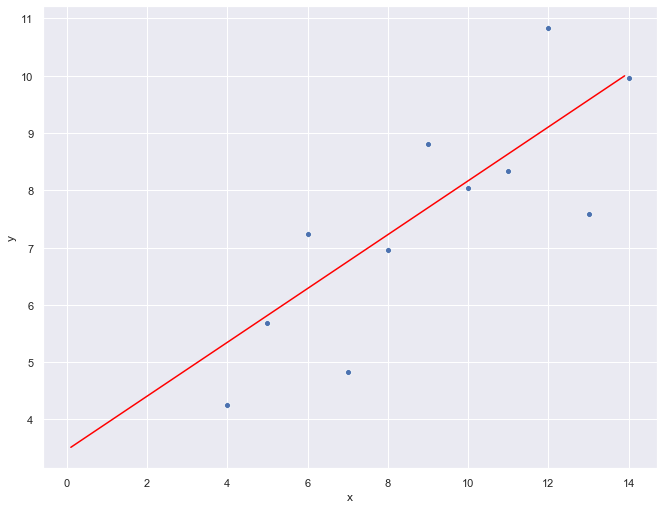

In [43]:
# graficos con seaborn
        
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(0.1,14,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [44]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el regresor consumo_litros_milla:\n')
print(df_metrics)
#como vemos el r2 es cercano a 1 y los errores la mayoria son menor a 1 por lo tanto podemos decir que es un buen modelo


Metricas para el regresor consumo_litros_milla:

      mae     mse    rmse   mape   maape   wmape   mmape   smape      r2
0  0.7161  1.2576  1.1214  0.142  0.1354  0.0941  0.1182  0.1196  0.7204


In [45]:
#Grupo2
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_grupo_2[['x']] # we only take the first two features.
y = df_grupo_2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

model_rl = LinearRegression()
model_rl.fit(X_train, y_train) 
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)
print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*y")

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3
El mejor ajuste lineal viene dado por la recta: 

     f(x) = 1.92 + 0.63*y


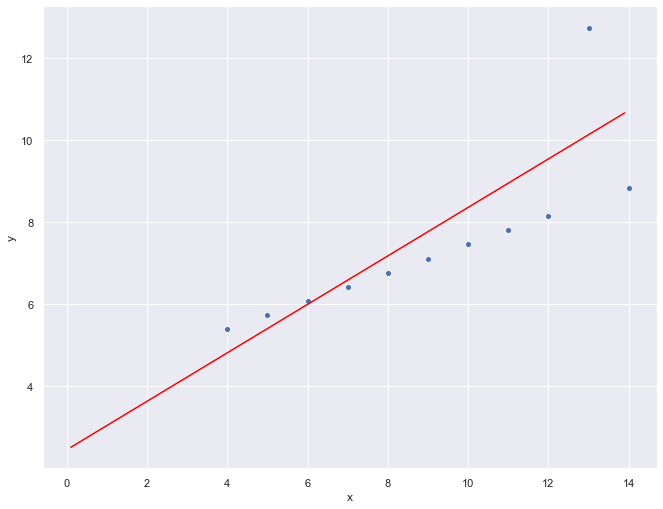

In [52]:
# graficos con seaborn
        
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(0.1,14,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [47]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el regresor consumo_litros_milla:\n')
print(df_metrics)
#como vemos el r2 es mayor que 1 y los errores la mayoria son menor a 1 por lo tanto podemos decir que es un buen
#modelo pero los datos no estan relacionados linealmente


Metricas para el regresor consumo_litros_milla:

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  1.4986  2.8504  1.6883  0.1851  0.1813  0.1835  0.1647  0.1752 -3.8207


In [49]:
#Grupo3
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_grupo_3[['x']] # we only take the first two features.
y = df_grupo_3['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

model_rl = LinearRegression()
model_rl.fit(X_train, y_train) 
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)
print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*y")

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3
El mejor ajuste lineal viene dado por la recta: 

     f(x) = 2.46 + 0.59*y


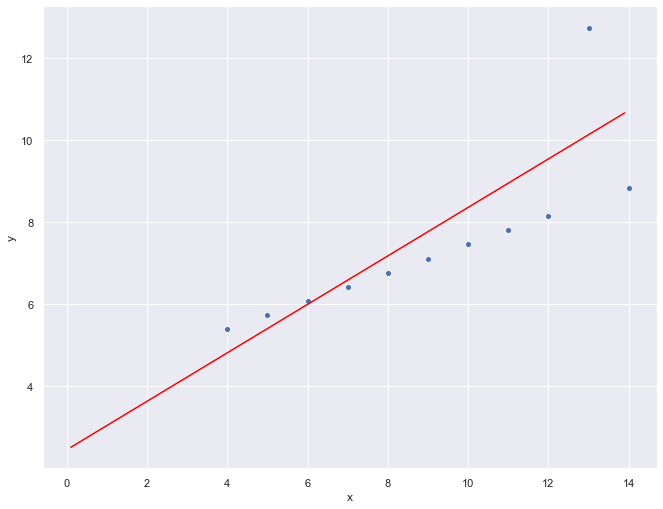

In [50]:
# graficos con seaborn
        
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(0.1,14,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [51]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el regresor consumo_litros_milla:\n')
print(df_metrics)
#como vemos el r2 es cercano 1 y los errores la mayoria son menor a 1 por lo tanto podemos decir que es un buen
#modelo y que los datos si estan relacionados linealmente


Metricas para el regresor consumo_litros_milla:

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.9813  1.4548  1.2062  0.1196  0.1184  0.1296  0.1065  0.1105 -0.4807


In [53]:
#Grupo4
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_grupo_4[['x']] # we only take the first two features.
y = df_grupo_4['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

model_rl = LinearRegression()
model_rl.fit(X_train, y_train) 
beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)
print(f"El mejor ajuste lineal viene dado por la recta: \n\n     \
f(x) = {beta_0} + {beta_1}*y")

Separando informacion:

numero de filas data original :  11
numero de filas train set     :  8
numero de filas test set      :  3
El mejor ajuste lineal viene dado por la recta: 

     f(x) = 2.87 + 0.51*y


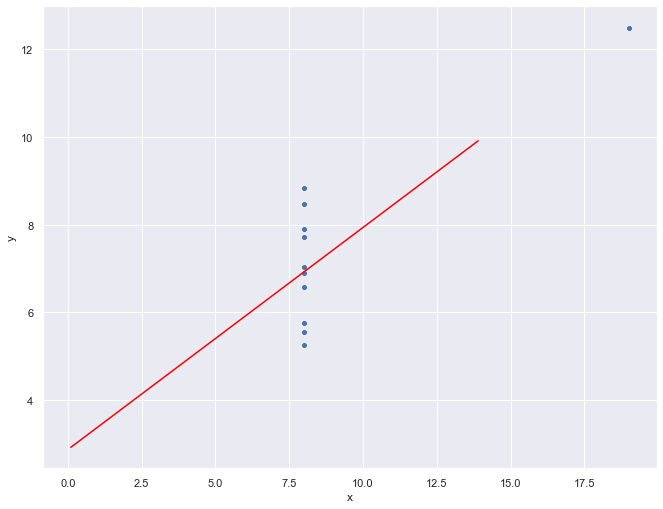

In [54]:
# graficos con seaborn
        
beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]
        
x_range = np.arange(0.1,14,0.1)
        
df_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [55]:
from metrics_regression import *
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df_metrics = summary_metrics(df_temp)
df_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el regresor consumo_litros_milla:\n')
print(df_metrics)
#como vemos el r2 es cercano 1 y los errores la mayoria son menor a 1 pero segun la grafica los datos están
#relacionados linealmente pero de manera inversa


Metricas para el regresor consumo_litros_milla:

      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.4814  0.3671  0.6059  0.0644  0.0642  0.0671  0.0568  0.0668 -0.2071


# 5.

In [56]:
# En el caso del Grupo 2 es claro que tiene forma de parabola asi que es preferible ocupar otros metodos
# En el caso del Grupo 3 hay un dato que se escapa del comportamiento asi que es preferible ocupar otro método
# que no sea el de una regresión lineal, o tomar ese dato como uno en particular
# En el caso del Grupo 4, los datos estan relacionados pero de manera inversa, lo preferible es realizar la regresion
# intercambiando los ejes